In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [65]:
X, y = make_regression(n_samples=100, n_features=1, n_targets=1, noise=20, random_state=13)

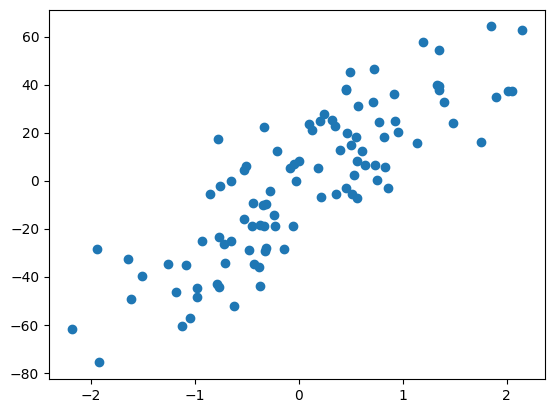

In [66]:
plt.scatter(X, y)

In [165]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [166]:
model = LinearRegression()
model.fit(X_train, y_train)
print(model.coef_) 
print(model.intercept_)

[28.16404017]
-2.7130725669241036


In [168]:
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6186926408914155

In [163]:
np.mean(cross_val_score(model, X, y, scoring="r2", cv=10))

0.6375011587464419

In [158]:
class GDRegressor:

    def __init__(self, epochs, learning_rate):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
    def fit(self, X, y):
        for i in range(self.epochs):
            slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
            slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b) * X.ravel())

            self.b = self.b - self.lr * slope_b
            self.m = self.m - self.lr * slope_m
        print(self.m, self.b)
    def predict(self, X):
        return self.m * X + self.b


In [169]:
gd = GDRegressor(500, 0.001)

In [170]:
gd.fit(X_train, y_train)

28.164040171229423 -2.713072566924105


In [172]:
y_pred = gd.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6186926408914154

In [161]:
print(gd.predict(X))

[[-22.11921675]
 [-14.45967366]
 [-14.92180713]
 [ 24.22071242]
 [  4.32438502]
 [ 21.67112396]
 [ -9.06604965]
 [  2.85194818]
 [-22.35878911]
 [-14.25795969]
 [ 53.78500401]
 [  8.75972323]
 [  3.48793424]
 [ -8.76271288]
 [-23.68416726]
 [ 10.31579458]
 [ 15.5120049 ]
 [  7.71035289]
 [-47.24011599]
 [ 46.38331521]
 [-24.25080297]
 [-16.54175581]
 [-28.12854173]
 [ 57.54630841]
 [ -8.06489084]
 [-47.90758522]
 [-11.71784416]
 [-11.25883101]
 [-15.69039214]
 [-16.85340596]
 [ 17.79616478]
 [ 19.01909784]
 [ 10.32476711]
 [-37.40282965]
 [-63.15798748]
 [-35.28268709]
 [  3.75652002]
 [ 34.7254359 ]
 [-32.54893283]
 [ 13.35192538]
 [-44.39433614]
 [ -2.36122658]
 [-10.0346972 ]
 [ 10.27833033]
 [ 30.84031016]
 [ 23.37233236]
 [ 20.38502282]
 [-19.57542424]
 [ 23.13291496]
 [ 29.38289111]
 [ 38.85425675]
 [-20.41240352]
 [-12.75587946]
 [-23.85205448]
 [ 11.6509497 ]
 [ 35.27840723]
 [ 17.99653854]
 [ -4.5669515 ]
 [-26.06391242]
 [ 10.66362788]
 [ -3.53318027]
 [ -3.89576109]
 [ 50.37

In [164]:
np.mean(cross_val_score(gd, X, y, scoring="r2", cv=10))

TypeError: Cannot clone object '<__main__.GDRegressor object at 0x0000023437152CB0>' (type <class '__main__.GDRegressor'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.